<h1>Modelling and Inference on Camden Street Crime (An Example)</h1>
This notebook provides a sample modelling and inference on the Camden street crime dataset. We have used a filtered dataset created from the dataset obtained using the notebook <a href='data_collection_camden_street_crime.ipynb'>here</a> where we consider only <strong>Violence and Sexual Offences</strong> street crimes for modelling and prediction. We try to predict this particular crime for a specific Ward (Neighbourhood) based on a time-series data on Violence and Sexual Offences crime.<br/>
This follows our explanatory data analysis that we performed in this notebook <a href='EDA_camden_street_crime.ipynb'>here</a>.

<h4>Initial Data Analysis</h4>
In this part, we load the dataset and perform similar analysis that we did in our explanatory data analysis notebook for overall crime but this one is only for a specific crime.

In [1]:
# python libraries: pandas, numpy, pyplot and datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
# loading the filtered dataset which only considers the Violence and Sexual Offences street crime in London Borough of Camden over 2015-2020
df = pd.read_csv('data/Violence_And_Sexual_Offences_Filtered.csv')
# setting the reporting date as index of time-series data
df['Epoch'] = df['Epoch'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df= df.set_index(['Epoch'])
print('Dataset shape: {}'.format(df.shape)) # rows and columns of the dataset
print('Different Ward Names ({}): {}'.format(len(df['Ward Name'].unique()),sorted(df['Ward Name'].unique()))) # different ward/neighbourhood names within London Borough of Camden
df.head()

Dataset shape: (41515, 2)
Different Ward Names (18): ['Belsize', 'Bloomsbury', 'Camden Town with Primrose Hill', 'Cantelowes', 'Fortune Green', 'Frognal and Fitzjohns', 'Gospel Oak', 'Hampstead Town', 'Haverstock', 'Highgate', 'Holborn and Covent Garden', 'Kentish Town', 'Kilburn', "King's Cross", "Regent's Park", 'St Pancras and Somers Town', 'Swiss Cottage', 'West Hampstead']


,Category,Ward Name
Epoch,,
2017-06-01,Violence and sexual offences,Haverstock
2017-03-01,Violence and sexual offences,Belsize
2017-10-01,Violence and sexual offences,Kentish Town
2017-02-01,Violence and sexual offences,Fortune Green
2016-02-01,Violence and sexual offences,Belsize


In [3]:
temp_df = pd.DataFrame(df.resample('M').size())
print('The specific month (and year) with the most violence and sexual offence street crime: {} ({})'.format(str(temp_df.idxmax()[0]).split(' ')[0], str(df.resample('Y').size().idxmax()).split(' ')[0].split('-')[0]))
print('The specific month (and year) with the least violence and sexual offence street crime: {} ({})'.format(str(temp_df.idxmin()[0]).split(' ')[0], str(df.resample('Y').size().idxmin()).split(' ')[0].split('-')[0]))

month_lst = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

temp_df = pd.DataFrame([dict(zip(month_lst, list(temp_df['2015-01-01' :'2015-12-31'][0]))), \
                              dict(zip(month_lst, list(temp_df['2016-01-01' :'2016-12-31'][0]))), \
                              dict(zip(month_lst, list(temp_df['2017-01-01' :'2017-12-31'][0]))), \
                              dict(zip(month_lst, list(temp_df['2018-01-01' :'2018-12-31'][0]))), \
                              dict(zip(month_lst, list(temp_df['2019-01-01' :'2019-12-31'][0]))), \
                              dict(zip(month_lst, list(temp_df['2020-01-01' :'2020-12-31'][0])))], \
                  index = ['2015', '2016', '2017', '2018', '2019', '2020'])
temp_df['Total'] = temp_df.sum(axis=1)
print('\nTable of total Violence and Sexual Offences over various months/years of London Borough of Camden\n***********************************************************************************')
temp_df.head(6)

The specific month (and year) with the most violence and sexual offence street crime: 2018-07-31 (2018)
The specific month (and year) with the least violence and sexual offence street crime: 2020-04-30 (2020)

Table of total Violence and Sexual Offences over various months/years of London Borough of Camden
***********************************************************************************


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
2015,459,458,511,476,504,589,534,561,562,604,611,562,6431
2016,569,489,536,568,617,539,574,580,596,495,477,587,6627
2017,469,491,579,617,591,614,595,579,594,641,566,582,6918
2018,612,569,656,667,730,693,765,659,662,639,641,635,7928
2019,575,555,639,604,612,621,697,630,563,621,558,561,7236
2020,547,560,569,392,444,556,581,572,561,586,544,463,6375


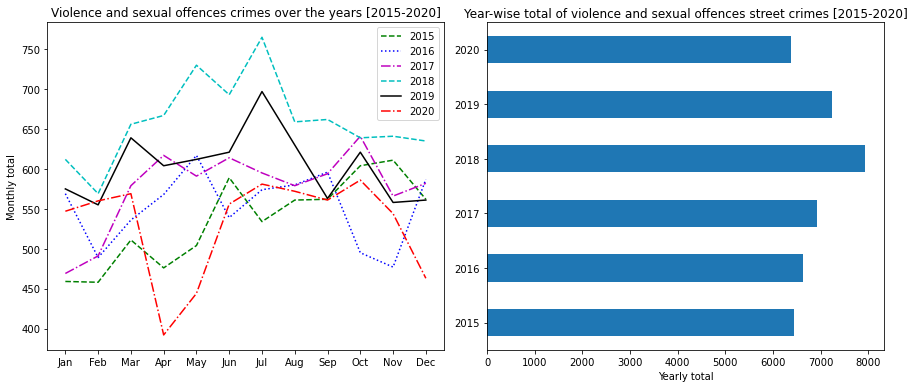

In [4]:
labels = ['2015', '2016', '2017', '2018', '2019', '2020'] # dataset span across six years
line_style = ['--g', ':b', '-.m', '--c', '-k', '-.r'] # these are just line styles for the graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12.5, 5.5)) # 1 row, 2 columns for the 2 drawn graphs below
# the graph showing the monthly violence and sexual offences crimes for different years
for i in range(len(labels)):
    axes[0].plot(month_lst, list(temp_df.drop(['Total'], axis=1).loc[labels[i]]), line_style[i], label=labels[i])   

# total yearly street crimes between 2015 and 2020
temp_df['Total'].plot(kind='barh', ax=axes[1], title='Year-wise total of violence and sexual offences street crimes [2015-2020]')

# setting titles, x and y labels
axes[0].set_title('Violence and sexual offences crimes over the years [2015-2020]')
axes[0].set_ylabel('Monthly total')
axes[0].legend(loc='best')
axes[1].set_xlabel('Yearly total')

fig.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

In [5]:
# In this part, we will only consider this particular street crime for St. Pancras and Somers Town Borough
df1 = df[df['Ward Name']=='St Pancras and Somers Town'].copy()
print('Dataset shape: {}'.format(df1.shape)) # rows and columns of the dataset
print('Different Ward Names ({}): {}'.format(len(df1['Ward Name'].unique()),sorted(df1['Ward Name'].unique()))) # different ward/neighbourhood names within London Borough of Camden
df1.head()

Dataset shape: (4004, 2)
Different Ward Names (1): ['St Pancras and Somers Town']


,Category,Ward Name
Epoch,,
2018-02-01,Violence and sexual offences,St Pancras and Somers Town
2016-12-01,Violence and sexual offences,St Pancras and Somers Town
2016-04-01,Violence and sexual offences,St Pancras and Somers Town
2019-08-01,Violence and sexual offences,St Pancras and Somers Town
2015-07-01,Violence and sexual offences,St Pancras and Somers Town


<h2>More EDA Analysis</h2>
In this part, we will convert a time-series dataset suitable for a ML regression task. We also perform more explanatory data analysis in order to gauge the suitability of a particular ML algorithm.

In [6]:
# dropping the Ward Name column
df1.drop(['Ward Name'], axis=1, inplace=True)
df1 = df1.resample('M').count()
df1.head() # Category keeps the count: the monthly total of this crime

,Category
Epoch,
2015-01-31,37
2015-02-28,36
2015-03-31,51
2015-04-30,50
2015-05-31,46


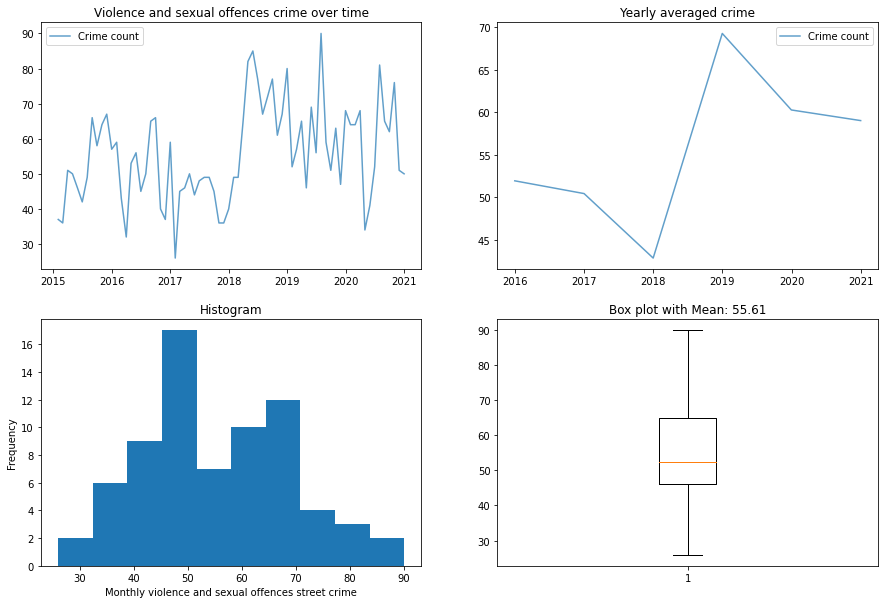

In [7]:
# Some exploratory data analysis on the target variable in order to choose an appropriate algorithm
_ = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(221)
_ = ax1.plot(df1['Category'], label='Crime count', alpha=0.7)
_ = ax1.set_title('Violence and sexual offences crime over time')
_ = plt.legend()

ax2 = plt.subplot(222)
_ = ax2.plot(df1.resample('Y').mean(), label='Crime count', alpha=0.7)
_ = ax2.set_title('Yearly averaged crime')
_ = plt.legend()

# histogram to check the overall distribution
ax3 = plt.subplot(223)
_ = ax3.hist(df1['Category'])
_ = ax3.set_title('Histogram')
_ = ax3.set_xlabel('Monthly violence and sexual offences street crime')
_ = ax3.set_ylabel('Frequency')

# box plot: gives an idea of the shape of the distribution
ax4 = plt.subplot(224)
_ = ax4.boxplot(df1['Category'])
_ = ax4.set_title('Box plot with Mean: {:.2f}'.format(df1['Category'].mean()))

In [8]:
# creating a new 'target' column: ahead of Category by 1 time-unit
df1['TARGET'] = df1['Category'].shift(-1)
df1 = df1.fillna(df1['Category'].iloc[-1]) # not dropping the last entry: just replacing it by the count of previous month
df1.tail()

,Category,TARGET
Epoch,,
2020-08-31,65,62.0
2020-09-30,62,76.0
2020-10-31,76,51.0
2020-11-30,51,50.0
2020-12-31,50,50.0


<AxesSubplot:title={'center':"TARGET's correlation with features"}>

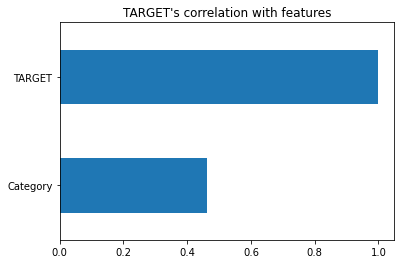

In [9]:
# show the corration of 'TARGET' variable with respect to other features
df1.corrwith(df1['TARGET']).plot(kind='barh', title="TARGET's correlation with features")

<h2>Modelling</h2>

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# dropping the TARGET column [target variable]
X = df1.drop(['TARGET'], axis = 1)
y = df1['TARGET']
# standardisation of the features: extremely important so that the effect of 'magnitude difference' between features do not affect the optimisation of weights
# some are not given more importance just because of higher magnitude?
#sc = StandardScaler()
#X = sc.fit_transform(X) # not needed for this model: single feature with simple linear regression

# separating of training and testing set: 80-20 separation
# random_state parameter is given to keep the same randomised splitting: important when you are creating the model
# and want to keep a specific separation across multiple runs. Once modelling/evaluation is completed, you can actually
# remove this parameter to generate random splitting in each run of this notebook
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instance of linear regression model
lr = LinearRegression()

lr.fit(X_train, y_train) # fitting on our dataset

# the next part is just used to display the weights we have obtained for LinearRegression for features and the intercept
arr = (list(df1.columns) + ['INTERCEPT'])
arr.remove('TARGET')
w_coef = np.append(lr.coef_, lr.intercept_)

df_weights = pd.DataFrame(data = [list(w_coef)], columns=arr)
df_weights.head(1)

,Category,INTERCEPT
0,0.502884,29.250863


<h2>Evaluation</h2>

In [11]:
from math import sqrt

# computing adjusted r2 score: this one is not used in this notebook since only one feature
# arguments: K = dimension of the features used
# N = no of samples
# r2_score: r2 score
def adj_r2_score(r2score, n, k):
    return (1 - ((1 - r2score) * (n-1) / (n-k-1)))


# model evaluation for training set
y_train_predict = lr.predict(X_train)
mae = mean_absolute_error(y_train, y_train_predict)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2score = r2_score(y_train, y_train_predict)


print("\nTraining SET\n--------------------------------------")
#print("--------------------------------------")
print('Mean Absolute Error: {}\nRoot Mean Squared Error: {}\nR2 score: {}'.format(mae, rmse, r2score))

# two dimensional dictionary: to store the evaluation results
eval = {}
eval['training']  = {}
eval['training']['lr'] = [mae, rmse, r2score] # a list

# model evaluation for testing set
y_test_predict = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2score = r2_score(y_test, y_test_predict)

print("\nTesting SET\n--------------------------------------")
print('Mean Absolute Error: {}\nRoot Mean Squared Error: {}\nR2 score: {}'.format(mae, rmse, r2score))

eval['testing']  = {}
eval['testing']['lr'] = [mae, rmse, r2score]


Training SET
--------------------------------------
Mean Absolute Error: 9.165744764146355
Root Mean Squared Error: 12.060078682095938
R2 score: 0.22668280615512082

Testing SET
--------------------------------------
Mean Absolute Error: 10.540217559406397
Root Mean Squared Error: 12.207274544974561
R2 score: 0.07935187093437923


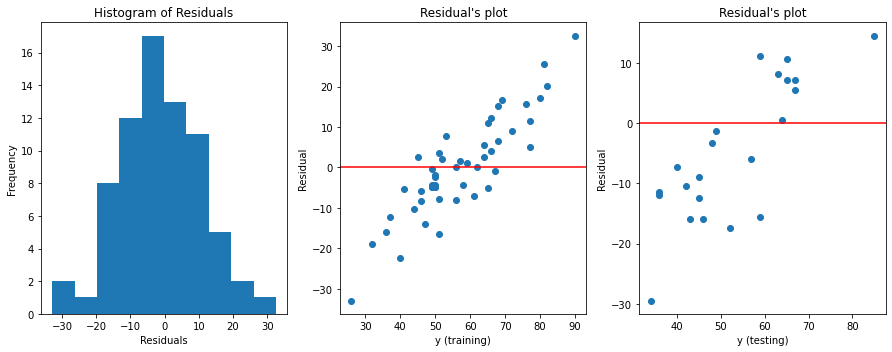

In [12]:
# residual analysis, i.e., residual = actual(y) - predicted(y)
_ = plt.figure(figsize=(12.5,5))

y_predict = np.concatenate((y_train_predict, y_test_predict))

ax1 = plt.subplot(131)
_ = ax1.hist(np.concatenate((y_train, y_test)) - y_predict)
_ = ax1.set_title('Histogram of Residuals')
_ = ax1.set_xlabel('Residuals')
_ = ax1.set_ylabel('Frequency')

# residual plot on the training set
ax2 = plt.subplot(132)
_ = ax2.scatter(y_train, y_train - y_train_predict)
_ = ax2.axhline(y=0, color='r', linestyle='-')
_ = ax2.set_title("Residual's plot")
_ = ax2.set_xlabel('y (training)')
_ = ax2.set_ylabel('Residual')

# residual plot on the testing set
ax3 = plt.subplot(133)
_ = ax3.scatter(y_test, y_test - y_test_predict)
_ = ax3.axhline(y=0, color='r', linestyle='-')
_ = ax3.set_title("Residual's plot")
_ = ax3.set_xlabel('y (testing)')
_ = ax3.set_ylabel('Residual')

plt.tight_layout()
plt.show()

<h2>Inference</h2>
In this part, we just infer/draw the last (recent) few months' predictions of our trained model.

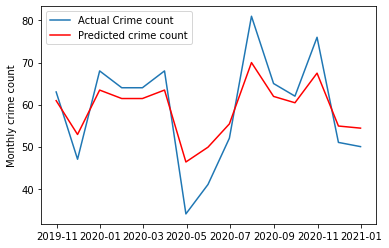

In [13]:
# this part is just to draw for the last 20% data prediction with the already fitted model
test = X[int(X.shape[0] * 0.8):]
# grid is already trained model
pred = lr.predict(test)

plt.plot(test.index, test['Category'], label='Actual Crime count')
plt.plot(test.index, pred, color='red', label='Predicted crime count')
plt.ylabel('Monthly crime count')
plt.legend(loc='best')
plt.show()

<h2>Conclusion</h2>
1. The assumptions on the dataset for Linear Regression (LR) (or other Machine Learning algorithms in general) are generally not met as revealed during the EDA. Therefore, it should not have been applied in the first place. Expectedly, we obtained poor performance of Linear Regression algorithm on this dataset. <br/>
2. We applied LR algorithm anyway since this is just a first exploration exercise on the dataset. Furthermoe, we added a classifical statistical algorithm and a simple model's performance just for comparison purpose in the Appendix below. This is again to outline the chosen task's inapplicability on this dataset.<br/>
3. None of the results are generally acceptable which goes to prove our reservation on the dataset (limited) - besides being a small sample, there is also absence of finer details (e.g., date/time details) regarding a time-series analysis which cannot be obtained through the Police API.<br/>
4. Given time:<br/>
i) More data (+finer details on time-series) are needed.<br/>
ii) More features could be explored - even for this exercise, we might have used the same crime's (violence and sexual offences) distributon around St. Pancras and Somers Town's neighbourhoods.
iii) After fixing the above two, then more EDA needs to be performed to choose a suitable Machine Learning (or even classical time-series forcasting) algorithm. Thereafter, the chosen algorithm's hyper-parameters may need to be chosen carefully (e.g., Grid Search) for improved performance. 

<h2>Appendix</h2>
This part just utilises two models -- a classical time-series model, ARIMA (Auto-Regressive Integrated Moving Average) prediction, and a simple model which just predicts current month's crime count as the next month's one. In order to have further analysis on the poor performance that was obtained via machine learning models used above. These models' performances are not great either which further strengthens our conclusions about data and the adopted model's suitability.

In [14]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

#def evaluate_model(df, order, seasonal_order):
def evaluate_model_arima(df, order):
    # last 60 dataset as testing
    # rolling testing, after testing with one sample
    # incorporate that sample inside the training dataset    
    length = df.shape[0]
    #test_size = int(length * 0.2)
    test_size = 60
    train, test = df[:(length-test_size)], df[(length-test_size):]
    
    history = [x for x in train.values]
    # pred variable will contain all the predictions
    pred = []
    
    for i in range(test.shape[0]):
        #model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
        model = ARIMA(history, order=order)
        
        fit_model = model.fit()
        yhat = fit_model.forecast()[0]
        pred.append(yhat)
        #print('predicted=%f, expected=%f' % (yhat, test.iloc[i].values))
        history.append(test.iloc[i].values)
        
    return pred, test.values

In [15]:
# this just returns the same count as seen during the current month (i.e., the feature itself)
def evaluate_model_simple(df):
    length = df.shape[0]
    #test_size = int(length * 0.2)
    test_size = 60
    train, test = df[:(length-test_size)], df[(length-test_size):]
    return test['Category'].values, test['TARGET'].values # return the same value [previous month's count] as prediction

In [16]:
# evaluation metrics: ARIMA model
y_pred_arima, y_true_arima = evaluate_model_arima(df1.drop(['TARGET'], axis=1), (1, 0, 0))
rmse = sqrt(mean_squared_error(y_true_arima, y_pred_arima))
mae = mean_absolute_error(y_true_arima, y_pred_arima)
r2score = r2_score(y_true_arima, y_pred_arima)

print('ARIMA PERFORMANCE METRICS [ROLLING EVALUATION]:\nMean Absolute Error: {}\nRoot Mean Squared Error: {}\nR2 Score: {}\n'.format(mae,rmse, r2score))

# evaluation metrics: simple model which just predicts the current month's value as the next month's prediction
y_pred, y_true = evaluate_model_simple(df1)
rmse = sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2score = r2_score(y_true, y_pred)

print('SIMPLE (LAST KNOWN) MODEL PERFORMANCE METRICS:\nMean Absolute Error: {}\nRoot Mean Squared Error: {}\nR2 Score: {}'.format(mae, rmse, r2score))

ARIMA PERFORMANCE METRICS [ROLLING EVALUATION]:
Mean Absolute Error: 10.416029809801916
Root Mean Squared Error: 13.255996822592046
R2 Score: 0.12631812277997578

SIMPLE (LAST KNOWN) MODEL PERFORMANCE METRICS:
Mean Absolute Error: 11.55
Root Mean Squared Error: 15.028306624500313
R2 Score: -0.11995437865714575


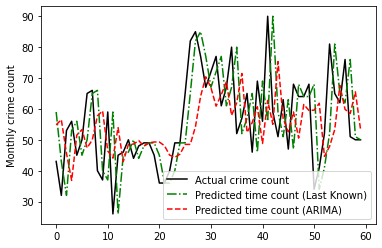

In [17]:
# drawning ARIMA, SIMPLE and ACTUAL values together for the testing set that has been used
fig, ax = plt.subplots()
ax.plot(y_true, '-k',label='Actual crime count')
ax.plot(y_pred, '-.g', label='Predicted time count (Last Known)') # Simple model
ax.plot(y_pred_arima, '--r', label='Predicted time count (ARIMA)') # Arima.
ax.set_ylabel('Monthly crime count')
ax.legend(loc='best')
plt.show()
#fig.savefig('arima.png', bbox_inches='tight')